<a href="https://colab.research.google.com/github/RitaDCassia/data_analysis/blob/main/dados_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# para graficos
import seaborn as srn
import statistics as sts

In [13]:
# importando dados nescessários
dataset = pd.read_csv('Churn.csv', sep=';')
# vendo arquivo
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [14]:
# verificando o tamanho no shape
# (999 linhas, 1 coluna)
dataset.shape

(999, 12)

In [16]:
# como podemos ver as colunas nao tem nome, entao vamos dar nomes a elas
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "salario", "Saiu"]

In [17]:
# ver as modificacoes
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


vamos tentar prever os clientes que podem sair do banco e tentar previnir com que eles nao saiam do banco

temos duas formas principais de explorar dados usando graficos ou estatistica

In [22]:
# explorar dados categoricos
# analizando o tamanho, quantas tem em cada estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

td, rp nao existe e sp está fora do campo do "banco".
podemos ver que a moda é o RS, portanto podemos mudar esses valores para a RS, por ele ser a moda.

<Axes: xlabel='Estado'>

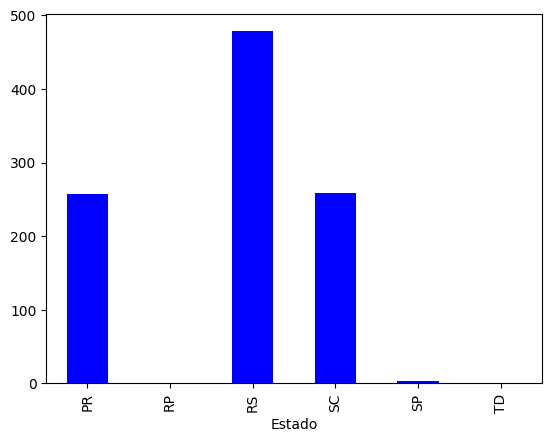

In [26]:
# verificar em um grafico de barras os dados
agrupado.plot.bar(color = 'blue')

In [27]:
# genero
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

Como podemos ver é a mesma informacao mas em formatos diferentes, porem sabemos que f e fem é feminino. nao podemos mudar esses dados para a moda, precisamos mudar para Feminino. tambem nao podemos deixar como está pois pode ocorrer algum problema com nosso modelo.

<Axes: xlabel='Genero'>

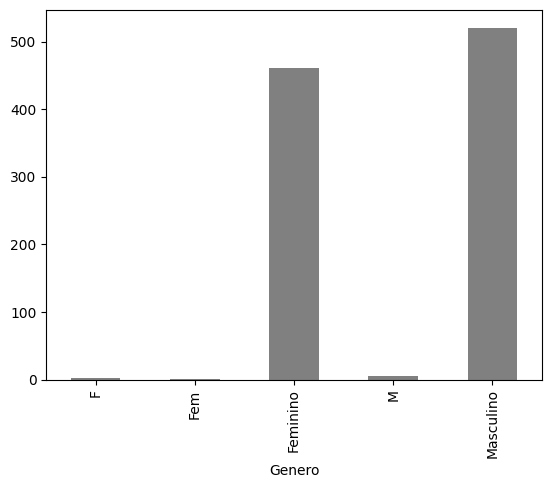

In [28]:
agrupado.plot.bar(color = "gray")

In [29]:
# explorar o score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

nessa verificacao temos a media (mean) sendo 648.621622. a mediana (50%) 653.000000. temos tambem valores minimos, a contagem de tudo, nao existe valor 0, entao aparentemente nao temos problemas.

Text(0.5, 1.0, 'Score')

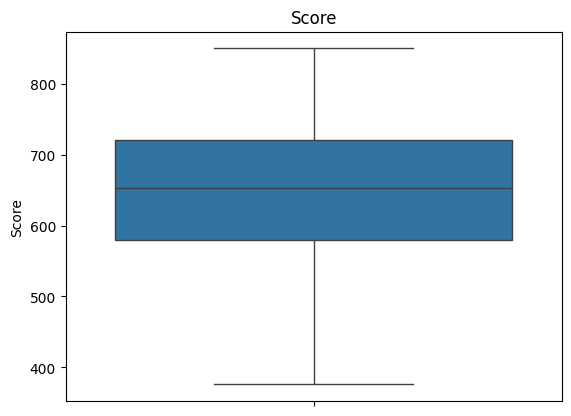

In [30]:
srn.boxplot(dataset['Score']).set_title('Score')

<ipython-input-32-12e89a2ac145>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Score']).set_title('Score')


Text(0.5, 1.0, 'Score')

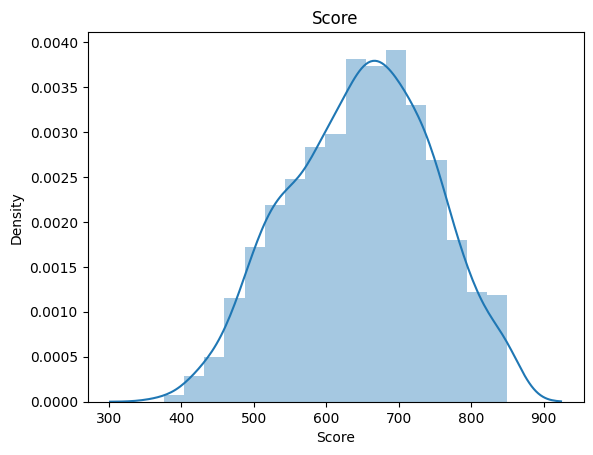

In [32]:
# visualizando os mesmos dados atravez de um estograma
srn.distplot(dataset['Score']).set_title('Score')

In [33]:
# verificar a idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Como podemos verificar temos idades erradas, como o valor minimo de -20 ou uma idade de 140. a media é 38 e a mediana 37.

Text(0.5, 1.0, 'Idade')

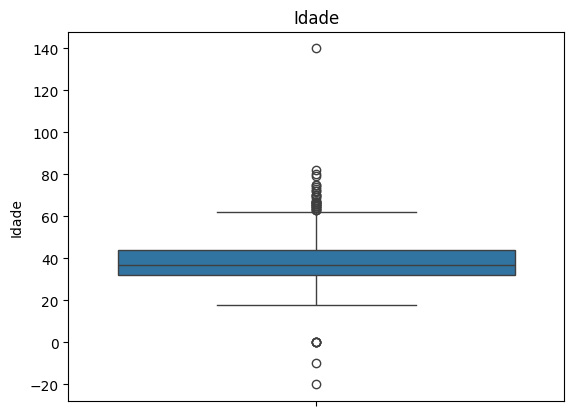

In [34]:
srn.boxplot(dataset['Idade']).set_title('Idade')

<ipython-input-36-f8bef777aa7e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset["Idade"]).set_title('Idadae')


Text(0.5, 1.0, 'Idadae')

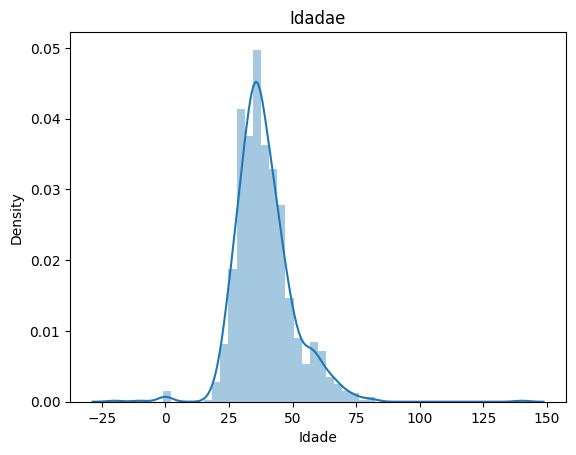

In [36]:
srn.distplot(dataset["Idade"]).set_title('Idadae')

In [37]:
# verificar o saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

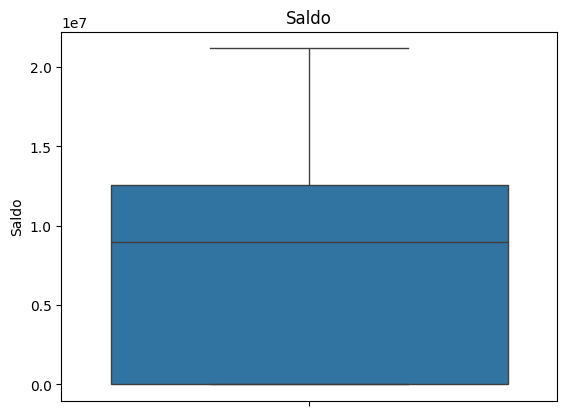

In [39]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

<ipython-input-41-8c7a9fcde676>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Saldo']).set_title('Saldo')


Text(0.5, 1.0, 'Saldo')

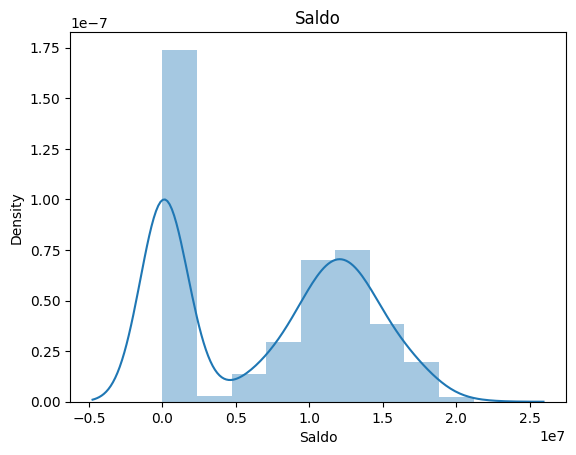

In [41]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

Nesse podemos ver que tem muitos saldos em 0, mas nao tem motivo pra tirar-mos o 0, pois as pessoas de fato podem ter saldo 0, o que é importente pra saber se vao abandonar a empresa ou nao.

In [45]:
dataset['salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

Text(0.5, 1.0, 'salario')

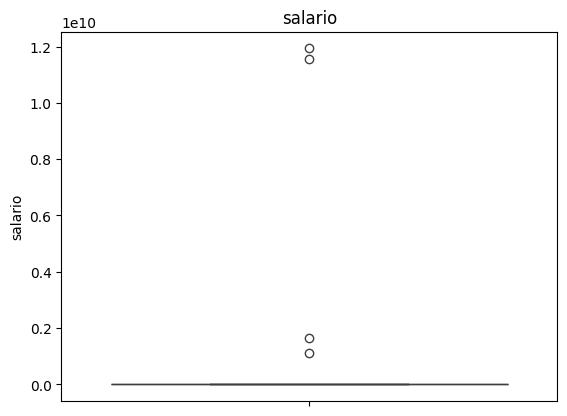

In [46]:
srn.boxplot(dataset['salario']).set_title('salario')

<ipython-input-47-63f10831f7c6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['salario']).set_title('salario')


Text(0.5, 1.0, 'salario')

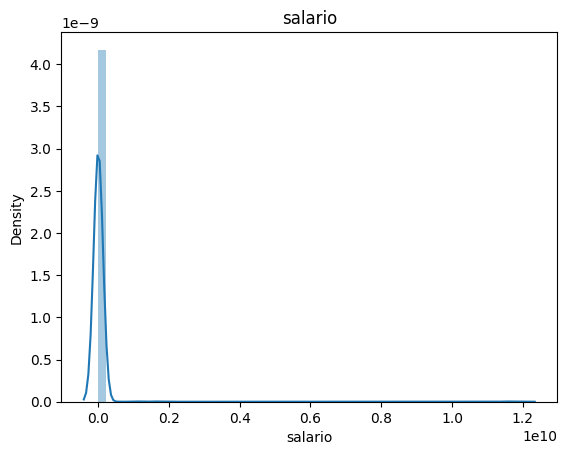

In [47]:
srn.distplot(dataset['salario']).set_title('salario')

muitos informaram salario igual a 0 ou nao informaram o salario

In [49]:
# contamos os valores nan
# genero e salario
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
salario           7
Saiu              0
dtype: int64

Agora vamos fazer as correcoes nos dados

Os primeiros problemas que vamos arrumar é os dos Nans, que vamos subistituir pela media.

In [51]:
# calculando a mediana do salario
mediana = sts.median(dataset['salario'])
mediana

70518.0

In [57]:
# substituindo os valores nulos
dataset['salario'].fillna(mediana, inplace=True)

In [58]:
# verificando quantos nulos tem em salario agora
dataset['salario'].isnull().sum()

0

In [60]:
# total de nas em genero
dataset['Genero'].isnull().sum()

8

In [61]:
# subistituindo para a moda
dataset['Genero'].fillna('Masculino', inplace=True)

In [62]:
dataset['Genero'].isnull().sum()

0

In [63]:
# padronizando de acordo com o dominio
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
# pega um grupo -> isin
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = "Feminino"
# visualizar o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [64]:
# idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [66]:
# visualizar idadea menores que 0 e maiores que 120
dataset.loc[(dataset['Idade'] < 0 ) | (dataset['Idade'] > 120)]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [68]:
# calcular a mediana
mediana = sts.median(dataset["Idade"])
mediana

37

In [69]:
# substituir
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [70]:
dataset.loc[(dataset['Idade'] < 0 ) | (dataset['Idade'] > 120)]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,salario,Saiu


In [71]:
# dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [72]:
# excluimos pelo id
# keep='first' -> mantem o primeiro
dataset.drop_duplicates(subset="Id", keep='first', inplace=True)

In [73]:
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,salario,Saiu


In [74]:
# estados fora do dominio
agrupado = dataset.groupby('Estado').size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [75]:
dataset.loc[dataset['Estado'].isin(['RP', 'TD', 'SP']), 'Estado'] = 'RS'

In [77]:
agrupado = dataset.groupby('Estado').size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [79]:
# outliers em salario, vamos considerar dois desvios padrao
desv = sts.stdev(dataset['salario'])
desv

528988918.4679201

In [81]:
# definir padrao maior que 2 desvio padrao
# salarios mais de duas vezes os desvios padrao
dataset.loc[dataset['salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [82]:
mediana = sts.median(dataset['salario'])
mediana

8637195.5

In [84]:
# atributos
dataset.loc[dataset['salario'] >= 2 * desv, 'salario'] = mediana


In [85]:
dataset.loc[dataset['salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,salario,Saiu


In [86]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [88]:
dataset.shape

(998, 12)